# Import Pacakages

In [1]:
import re
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LogisticRegression

# Pre Process book Data

In [1]:
name3 = 'pg31100.txt'
file = open(name3)
string = file.read()
raw_text = string.split('***')
new_text = raw_text[2]
new_text = re.sub(r'[^\w\s]','',new_text)
new_text = re.sub(r'http\S+', '',new_text)
new_text = re.sub(r'\d+','',new_text)
raw_text1 = ([i.replace("\n"," ") for i in new_text.split('\n\n') if len(i.split()) > 25][1:])
data_frame = []
for i in raw_text1:
    data_frame.append(i.lower())
df1 = pd.DataFrame(data_frame,columns = ['Text'])
df1['Label'] = 0

FileNotFoundError: [Errno 2] No such file or directory: 'pg31100.txt'

In [117]:
name3 = 'pg1661.txt'
file = open(name3)
string = file.read()
raw_text = string.split('***')
new_text = raw_text[2]
new_text = re.sub(r'[^\w\s]','',new_text)
new_text = re.sub(r'http\S+', '',new_text)
new_text = re.sub(r'\d+','',new_text)
raw_text1 = ([i.replace("\n"," ") for i in new_text.split('\n\n') if len(i.split()) > 25][1:])
data_frame = []
for i in raw_text1:
    data_frame.append(i.lower())
df2 = pd.DataFrame(data_frame,columns = ['Text'])
df2['Label'] = 1

In [118]:
name3 = '28054-0.txt'
file = open(name3)
string = file.read()
raw_text = string.split('***')
new_text = raw_text[2]
new_text = re.sub(r'[^\w\s]','',new_text)
new_text = re.sub(r'http\S+', '',new_text)
new_text = re.sub(r'\d+','',new_text)
raw_text1 = ([i.replace("\n"," ") for i in new_text.split('\n\n') if len(i.split()) > 25][1:])
data_frame = []
for i in raw_text1:
    data_frame.append(i.lower())
df3 = pd.DataFrame(data_frame,columns = ['Text'])
df3['Label'] = 2


# Create a dataframe for 3 books

In [119]:
frames = [df1,df2,df3]
result = pd.concat(frames, axis=0, sort=False,ignore_index = True)

# Split Training and Testing data

In [120]:
train_data,test_data,train_label,test_label = train_test_split(result['Text'],result['Label'],test_size = 0.2)
print(len(train_data))
print(len(test_data))

6928
1733


# Feature Extraction using TFIDF

In [121]:
vec = TfidfVectorizer()
vec.fit(train_data)
train_feature1 = pd.DataFrame(vec.transform(train_data).toarray(), columns=sorted(vec.vocabulary_.keys()))
test_feature = pd.DataFrame(vec.transform(test_data).toarray(), columns=sorted(vec.vocabulary_.keys()))
train_feature
train_feature = scipy.sparse.csr_matrix(train_feature1)

# Multi-Layer Perceptron Model using Backpropogation

In [105]:
clf = MLPClassifier(early_stopping = True,max_iter = 350)
clf.fit(train_feature,train_label)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=350, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [106]:
mlp_prediction = clf.predict(test_feature)

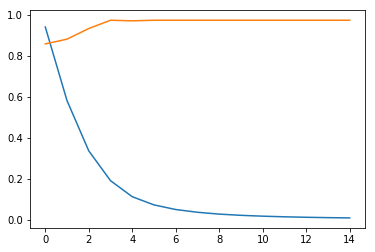

In [107]:
plt.plot(clf.loss_curve_)
plt.plot(clf.validation_scores_)
plt.show()

# Cross Validation Scores

In [108]:
mlp_scores = cross_val_score(clf, train_feature, train_label, cv=5)
print(mlp_scores)

[0.96539293 0.96536797 0.96606498 0.97545126 0.96173285]


In [109]:
mlp_accuracy = accuracy_score(test_label,mlp_prediction)
mlp_accuracy

0.9596076168493941

# Recall and Precison for MLP Classifier

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

precision_scores = cross_validate(clf, train_feature,train_label,scoring='precision_macro', cv=5)
recall_scores = cross_validate(clf, train_feature,train_label,scoring='recall_macro',cv=5)


recall = recall_scores['test_score']
precision = precision_scores['test_score']

print(f"Precision Scores: {recall}")
print(f"Recall Scores: {recall}")

Precision Scores: [0.93886743 0.93211517 0.93559174 0.94791366 0.92881588]
Recall Scores: [0.93886743 0.93211517 0.93559174 0.94791366 0.92881588]


# Logistic Regression Function with L2 Regularization

In [125]:
def stochiastic_gradient(x, y, w):
    sam, feat = x.shape
    dw = np.zeros((3, feat))
    #z = softmax(w,x)
    y = np.array(y)
    iter = len(x)
    for i in range(iter):
            z = softmax(w,x[i])
            sub = np.subtract(softmax(w,x[i]), y[i])
            sub = sub.reshape(3,1)
            k = x[i]
            k= k.reshape(1,feat)
            inner = np.dot(sub,k)
            dw = np.add(dw,inner)    
    return dw

def softmax(w,x):
    z = np.dot(x,w.T)
    return np.exp(z)/np.sum(np.exp(z), axis=0)

def loss(w,x,y,lr):
    cost = np.array((0,0,0))
    iter = len(x)
    sam, feat = x.shape
    y = np.array(y)
    for i in range(iter): 
        z  = softmax(w,x[i])
        cost = np.subtract(cost,np.dot(np.array(y[i]),np.log(softmax(w,x[i])))) 
    return (1/iter)*cost


def multi_regression(X,Y,lr,w):
    samples , feat = X.shape
    x = X.toarray()
    w = np.zeros((3,feat)) 
    for i in range(100):
        cost = loss(w,x,Y,lr) 
        gr = stochiastic_gradient(x,Y,w)
        #print(f"Gradient: {gr}")
        w = w - lr*gr
    return w

In [ ]:
weights = multi_regression(train_feature,train_label,0.001,0)

Error: [0.89496792 0.89496792 0.89496792]
Error: [0.89496792 0.89496792 0.89496792]
Error: [0.89496792 0.89496792 0.89496792]
Error: [0.89496792 0.89496792 0.89496792]


In [ ]:
def predict(X, weights):
    z = np.dot(X.toarray(), weights.T)
    #z = z.T
    print(z[1])
    k=[]
    samples, f = z.shape
    for i in range(samples):
        k.append(np.argmax(softmax(z[i])))
    #k = [x-1 for x in k]
    print(f"Predicticed values are: {k}")
    return k

# Analysis 

#### Logistic regression: The simplest form of Neural Network, that results in decision boundaries that are a straight line
#### Neural Networks: A superset that includes Logistic regression and also other classifiers that can generate more complex decision boundaries.
#### Logistic Regresion  with L2 regularization Accuracy = 95%
#### MLP Classifer Accuracy =  56%

#### Recall and Precision Score for MLP classifier is 